In [1]:
from scipy.stats import norm
import numpy as np
import pandas as pd
import yfinance as yf
import cufflinks as cf
import warnings
warnings.filterwarnings("ignore")
cf.set_config_file(offline=True)
import scipy.stats as stat


In [2]:
s0= 100 #Spot price
k=100 # Strike price 
r=0.05 #Risk free rate
t= 1 #time horizon
vol =0.2 #implied volatility 
sims = 100000 #number of simulations
path= 12

In [18]:
import numpy as np

def BSM(s0, k, r, t, vol, sims, path):
    d1 = (np.log(s0 / k) + (r + 0.5 * vol * vol) * t) / (vol * np.sqrt(t))
    d2 = d1 - vol * np.sqrt(t)
    S = np.zeros((sims, path + 1))
    dt = t / path
    S[:, 0] = s0
    
    for i in range(path):
        phi = np.random.randn(sims)
        S[:, i + 1] = S[:, i] * np.exp((r - 0.5 * vol * vol) * dt + vol * phi * np.sqrt(dt))
    
    return S


In [19]:
S= pd.DataFrame(BSM(s0, k, r , t, vol, sims, path))
S.head(10) #presenting first 10 rows


0           1           2           3           4           5   \
0  100.0   98.456196   98.046744  102.643645  107.844413  101.294832   
1  100.0   98.677294   98.436023  109.266867  109.546991  104.736710   
2  100.0  103.431661  104.533500  106.009809  106.098848  102.364743   
3  100.0  112.234105  115.387043  125.965617  115.573068  128.392706   
4  100.0   98.994204   88.122099   83.696102   81.292996   83.463793   
5  100.0   99.920219  100.619076   98.344017  104.241360  107.113780   
6  100.0   93.252968   93.615146   88.499504   90.608512   88.930972   
7  100.0  104.524220  106.523804  116.963333  112.037939  114.651671   
8  100.0   96.672616   90.438854   82.474492   87.457092   87.940036   
9  100.0   99.511935   99.979370   98.033583   96.256187  100.825315   

           6           7           8           9           10          11  \
0  106.807571  122.116963  127.788470  110.810219  116.639993  126.130472   
1  104.600739  108.921317  114.751632  109.502774  109.044413  111.548196   
2   91.177230   92.131944   87.508354   95.962575   97.350830   97.827071   
3  129.100222  135.413279  140.653671  153.362467  156.145103  150.036286   
4   86.650414   84.465207   80.954248   82.288453   76.715489   85.766481   
5  105.588560  104.515557   95.083294   86.568538   83.669243   92.281252   
6   93.058403   95.965742   96.971203  101.329222  104.850752   99.681443   
7  120.768525  121.325831  123.242891  127.917759  121.944000  121.395769   
8   85.712739   96.469047   91.208181   94.853651   99.898989  102.189872   
9   98.999218  107.952799  107.437112  108.278484  105.756279  102.877858   

           12  
0  132.128885  
1  112.134987  
2   98.415848  
3  147.068505  
4   90.411474  
5   98.888091  
6   97.884985  
7  118.956244  
8  114.709645  
9  107.204595

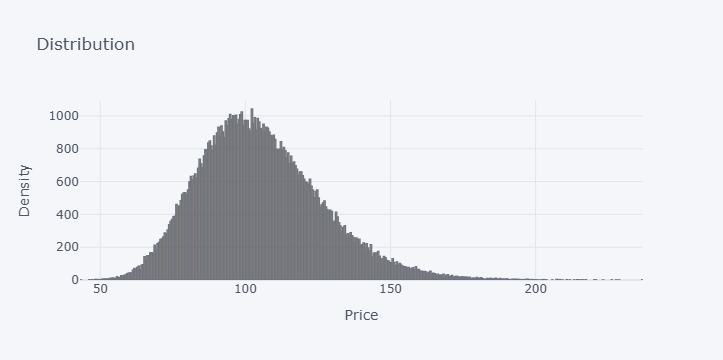

In [21]:
#checking graphical presentation of distribtion 
S.iloc[:100000, -1].iplot("hist", title="Distribution", xTitle="Price", yTitle="Density")


In [22]:
St= S.iloc[:,-1].mean(axis=0)
d1= (np.log(s0/k)+(r+0.5*vol*vol)*t)/vol*np.sqrt(t)
d2= d1- vol*np.sqrt(t)
Call= np.maximum(St*norm.cdf(d1)-k*np.exp(-r*t)*norm.cdf(d2),0)

In [23]:
Call

13.768743421925166

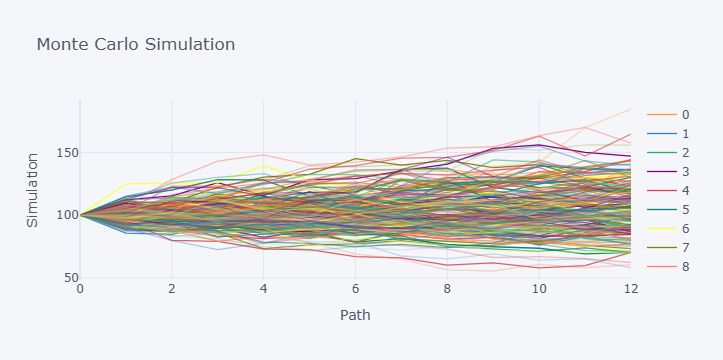

In [25]:
S.iloc[:200, :].T.iplot(title="Monte Carlo Simulation", xTitle="Path", yTitle="Simulation")


In [26]:
#Calculating price of Nifty-50 European call option having strike 24,550 with 3 days to e
s0= 24572.65 #Spot price
k=24550 # Strike price 
r=0.065 #Risk free rate
t= 0.008219 #time horizon
vol =0.11 #implied volatility 

In [27]:
d1= (np.log(s0/k)+(r+0.5*vol*vol)*t)/vol*np.sqrt(t)
d2= d1- vol*np.sqrt(t)
Call= np.maximum(s0*norm.cdf(d1)-k*np.exp(-r*t)*norm.cdf(d2),0)
print(Call)

115.5160124150043


In [30]:
import numpy as np
from scipy.stats import norm

def BSM(s0, k, r, t, vol):
    d1 = (np.log(s0 / k) + (r + 0.5 * vol * vol) * t) / (vol * np.sqrt(t))
    d2 = d1 - vol * np.sqrt(t)
    c = np.maximum(s0 * norm.cdf(d1) - k * np.exp(-r * t) * norm.cdf(d2), 0)
    
    return c


In [31]:
Call= BSM(s0, k, r , t, vol)


In [32]:
Call

116.61006572790757